In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

df = pd.read_csv("C:/Users/admin/Desktop/2023 Data ML-DS/dataset/hour.csv")


In [3]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [4]:

df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
# Renaming columns names to more readable names
df.rename(columns={'instant':'record_id',
                        'dteday':'datetime',
                        'holiday':'is_holiday',
                        'workingday':'is_workingday',
                        'weathersit':'weather_condition',
                        'hum':'humidity',
                        'mnth':'month',
                        'cnt':'total_count',
                        'hr':'hour',
                        'yr':'year'},inplace=True)
     

In [6]:

df.columns.values

array(['record_id', 'datetime', 'season', 'year', 'month', 'hour',
       'is_holiday', 'weekday', 'is_workingday', 'weather_condition',
       'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered',
       'total_count'], dtype=object)

In [7]:
#the registered and casual columns are added up to the total count therefore we can drop those columns.
df.drop(['record_id','casual', 'registered'], axis=1, inplace=True)

In [8]:
# date time conversion
df['datetime'] = pd.to_datetime(df.datetime)

# categorical variables
df['season'] = df.season.astype('category')
df['is_holiday'] = df.is_holiday.astype('category')
df['weekday'] = df.weekday.astype('category')
df['weather_condition'] = df.weather_condition.astype('category')
df['is_workingday'] = df.is_workingday.astype('category')
df['month'] = df.month.astype('category')
df['year'] = df.year.astype('category')
df['hour'] = df.hour.astype('category')

Text(0, 0.5, 'total_count')

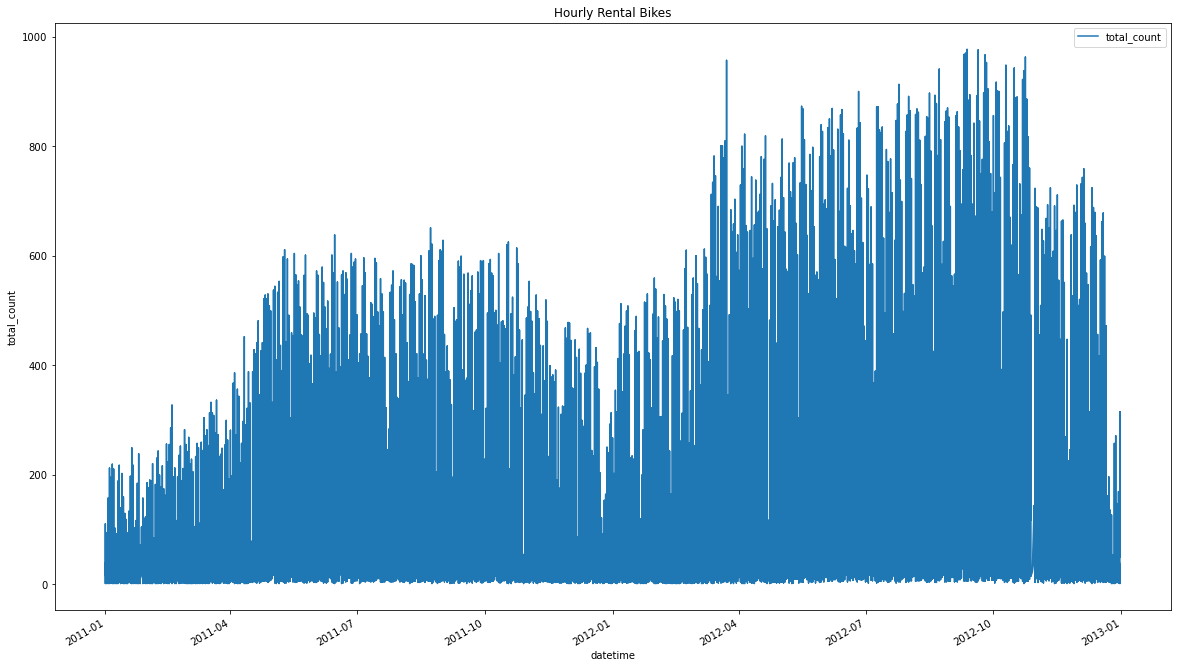

In [9]:
df.plot(x='datetime', y='total_count', figsize=(20,12), title = 'Hourly Rental Bikes')
plt.ylabel('total_count')

<AxesSubplot:ylabel='Frequency'>

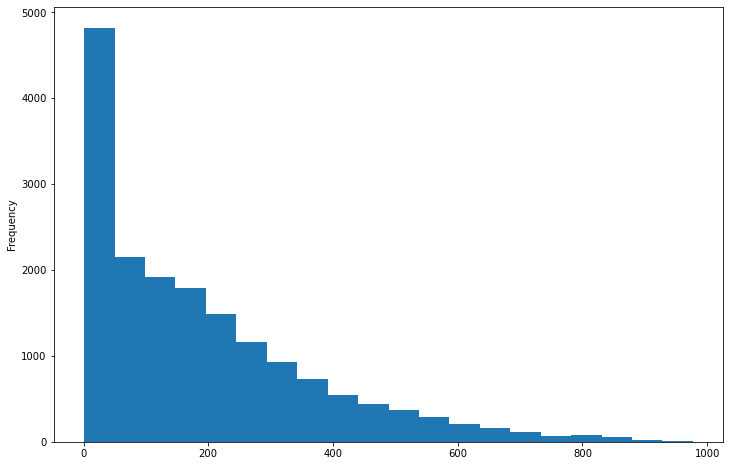

In [10]:
df['total_count'].plot.hist(bins=20, figsize=(12,8))

In [11]:
# get the correlation
 
df.corr()

,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,total_count
datetime,1.000000,0.404452,0.865648,0.489808,-0.006161,0.014737,0.001372,-0.003366,-0.014063,0.136074,0.137543,0.010196,-0.074645,0.277753
season,0.404452,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.178056
year,0.865648,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.250495
month,0.489808,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.120638
hour,-0.006161,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.394071
is_holiday,0.014737,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,-0.030927
weekday,0.001372,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.026900
is_workingday,-0.003366,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,0.030284
weather_condition,-0.014063,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.142426
temp,0.136074,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.404772


<AxesSubplot:>

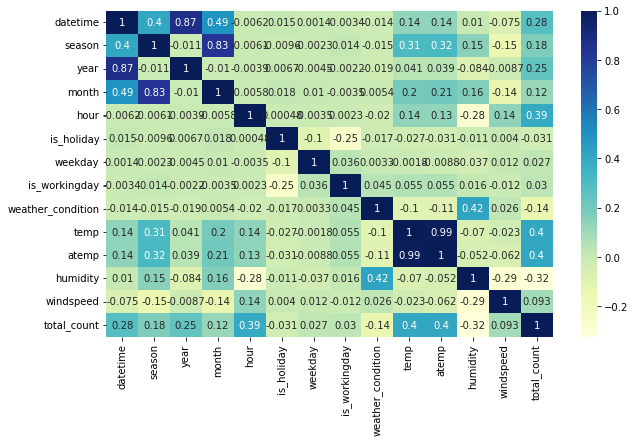

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
     

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()   


In [14]:
cat_attr_list = ['season','is_holiday',
                 'weather_condition','is_workingday',
                 'hour','weekday','month','year']
for col in cat_attr_list:
  df[col] = le.fit_transform(df[col])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   datetime           17379 non-null  datetime64[ns]
 1   season             17379 non-null  int64         
 2   year               17379 non-null  int64         
 3   month              17379 non-null  int64         
 4   hour               17379 non-null  int64         
 5   is_holiday         17379 non-null  int64         
 6   weekday            17379 non-null  int64         
 7   is_workingday      17379 non-null  int64         
 8   weather_condition  17379 non-null  int64         
 9   temp               17379 non-null  float64       
 10  atemp              17379 non-null  float64       
 11  humidity           17379 non-null  float64       
 12  windspeed          17379 non-null  float64       
 13  total_count        17379 non-null  int64         
dtypes: dat

In [15]:
df.drop(['temp'], axis=1, inplace=True)
     

In [16]:
df.drop('datetime', axis=1, inplace=True)

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
     

In [18]:
X = df.drop(['total_count'],axis=1)
y = df['total_count']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=5)

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape 
     

((12165, 11), (5214, 11), (12165,), (5214,))

In [21]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [22]:
predictions = regressor.predict(X_test)
predictions.shape

(5214,)

In [23]:
import math  
import sklearn.metrics  
mse = sklearn.metrics.mean_squared_error(y_test, predictions)  
  
rmse = math.sqrt(mse)  
rmse
     

144.4200144934657

In [24]:
from sklearn.ensemble import RandomForestRegressor
 
random_regressor = RandomForestRegressor().fit(X_train, y_train)
print(math.sqrt(mean_squared_error(y_test, random_regressor.predict(X_test))))

42.77924033410991


In [25]:
feat_importances = pd.DataFrame(random_regressor.feature_importances_, index=X_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances

,Importance
hour,0.607309
atemp,0.138093
year,0.079774
is_workingday,0.055724
humidity,0.029332
season,0.023890
weather_condition,0.019884
month,0.015928
weekday,0.015815
windspeed,0.011500


<AxesSubplot:>

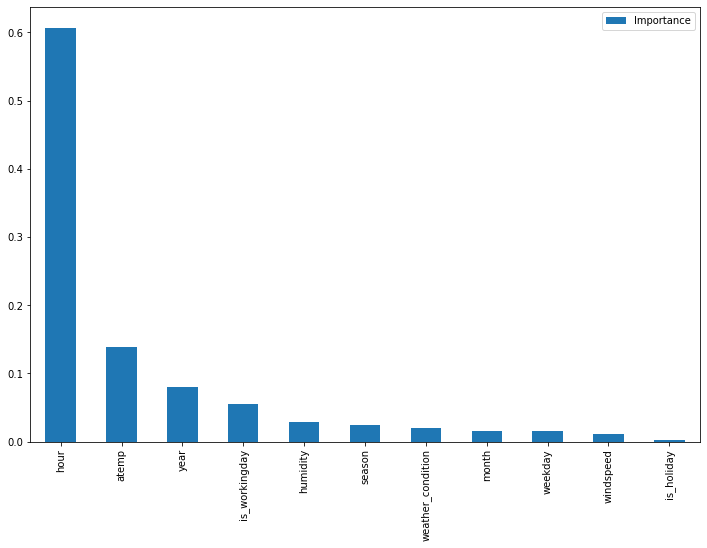

In [26]:
feat_importances.plot(kind='bar', figsize=(12,8))

In [27]:
#ML Pipeline

import pandas as pd
import numpy as np

In [28]:

df = pd.read_csv("C:/Users/admin/Desktop/2023 Data ML-DS/dataset/hour.csv")


In [29]:
# Renaming columns names to more readable names
df.rename(columns={'instant':'record_id',
                        'dteday':'datetime',
                        'holiday':'is_holiday',
                        'workingday':'is_workingday',
                        'weathersit':'weather_condition',
                        'hum':'humidity',
                        'mnth':'month',
                        'cnt':'total_count',
                        'hr':'hour',
                        'yr':'year'},inplace=True)

In [30]:
df.drop(['record_id','casual', 'registered','datetime','temp'], axis=1, inplace=True)

In [31]:
from sklearn.ensemble import  RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

In [32]:
X = df.drop(['total_count'],axis=1)
y = df['total_count']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [42]:
pipeline = Pipeline(steps = [
            ('regressor',RandomForestRegressor())
           ])

In [43]:
model = pipeline.fit(X_train, y_train)
print (model)

Pipeline(steps=[('regressor', RandomForestRegressor())])


In [44]:
predictions = model.predict(X_test)

In [45]:
print(math.sqrt(mean_squared_error(y_test, predictions)))

41.92856942132458


In [ ]:
#we build a simple machine learning pipeline in Python with scikit-learn since our dataset did not need a lot of transformation
#to be used in training. We can build more complex pipelines depending on the transformations performed on the dataset,
#such as encoding categorical variables and replacing missing values.